# ALS HD height above ground demo

Notebook creator: Sina Zumstein & Hannah Weiser, 2023

This demo scene uses a digital terrain model (DTM) of Heidelberg, Germany, which will be scanned by airborne laser scanning (ALS) with height above ground adaption. We will use the command-line access of HELIOS++ to run the simulation, and use Python just for displaying the input XMLs and the resulting point clouds.

In [1]:
import sys, os
from pathlib import Path
from IPython.display import Code

current_folder = globals()["_dh"][0]
helios_path = str(Path(current_folder).parent)
sys.path.append(helios_path)  # add helios-plusplus directory to PATH
import pyhelios

from pyhelios.util.xmldisplayer import display_xml, find_playback_dir

## Survey
Let us look at the XML files in the simulation. First, we investigate the **survey** XML file, `als_hd_height_above_ground_stripid.xml`:

In [2]:
os.chdir(helios_path)
Code(display_xml(r'data\surveys\demo\als_hd_height_above_ground_stripid.xml'), language='XML')

<document>
    <survey name="hdb_stripid5" platform="data/platforms.xml#sr22" scanner="data/scanners_als.xml#leica_als50" scene="data/scenes/demo/hd_demo.xml#hd_demo">
        <leg stripId="0">
            <platformSettings x="477280.4197453116" y="5472582.624303755" z="1619.0" onGround="false" movePerSec_m="250" />
            <scannerSettings active="true" pulseFreq_hz="83000" scanAngle_deg="30" scanFreq_hz="50" headRotatePerSec_deg="0.0" headRotateStart_deg="0.0" headRotateStop_deg="0.0" trajectoryTimeInterval_s="0.067" />
        </leg>
        <leg stripId="0">
            <platformSettings x="477899.24983534013" y="5472584.19493851" z="1658.0" onGround="false" movePerSec_m="250" />
            <scannerSettings active="true" pulseFreq_hz="83000" scanAngle_deg="30" scanFreq_hz="50" headRotatePerSec_deg="0.0" headRotateStart_deg="0.0" headRotateStop_deg="0.0" trajectoryTimeInterval_s="0.067" />
        </leg>
        <leg stripId="0">
            <platformSettings x="478029.5298542935" y="5472584.525598458" z="1693.0" onGround="false" movePerSec_m="250" />
            <scannerSettings active="true" pulseFreq_hz="83000" scanAngle_deg="30" scanFreq_hz="50" headRotatePerSec_deg="0.0" headRotateStart_deg="0.0" headRotateStop_deg="0.0" trajectoryTimeInterval_s="0.067" />
        </leg>
        <leg stripId="0">
            <platformSettings x="478159.8098732469" y="5472584.856258406" z="1731.0" onGround="false" movePerSec_m="250" />
            <scannerSettings active="true" pulseFreq_hz="83000" scanAngle_deg="30" scanFreq_hz="50" headRotatePerSec_deg="0.0" headRotateStart_deg="0.0" headRotateStop_deg="0.0" trajectoryTimeInterval_s="0.067" />
        </leg>
        <leg stripId="0">
            <platformSettings x="478257.5198874619" y="5472585.1042533675" z="1766.0" onGround="false" movePerSec_m="250" />
            <scannerSettings active="true" pulseFreq_hz="83000" scanAngle_deg="30" scanFreq_hz="50" headRotatePerSec_deg="0.0" headRotateStart_deg="0.0" headRotateStop_deg="0.0" trajectoryTimeInterval_s="0.067" />
        </leg>
        <leg stripId="0">
            <platformSettings x="478452.93991589197" y="5472585.60024329" z="1804.0" onGround="false" movePerSec_m="250" />
            <scannerSettings active="true" pulseFreq_hz="83000" scanAngle_deg="30" scanFreq_hz="50" headRotatePerSec_deg="0.0" headRotateStart_deg="0.0" headRotateStop_deg="0.0" trajectoryTimeInterval_s="0.067" />
        </leg>
        <leg stripId="0">
            <platformSettings x="478713.4999537987" y="5472586.2615631865" z="1767.0" onGround="false" movePerSec_m="250" />
            <scannerSettings active="true" pulseFreq_hz="83000" scanAngle_deg="30" scanFreq_hz="50" headRotatePerSec_deg="0.0" headRotateStart_deg="0.0" headRotateStop_deg="0.0" trajectoryTimeInterval_s="0.067" />
        </leg>
        <leg stripId="0">
            <platformSettings x="478843.7799727521" y="5472586.592223135" z="1732.0" onGround="false" movePerSec_m="250" />
            <scannerSettings active="true" pulseFreq_hz="83000" scanAngle_deg="30" scanFreq_hz="50" headRotatePerSec_deg="0.0" headRotateStart_deg="0.0" headRotateStop_deg="0.0" trajectoryTimeInterval_s="0.067" />
        </leg>
        <leg stripId="0">
            <platformSettings x="479234.6200296122" y="5472587.58420298" z="1765.0" onGround="false" movePerSec_m="250" />
            <scannerSettings active="true" pulseFreq_hz="83000" scanAngle_deg="30" scanFreq_hz="50" headRotatePerSec_deg="0.0" headRotateStart_deg="0.0" headRotateStop_deg="0.0" trajectoryTimeInterval_s="0.067" />
        </leg>
        <leg stripId="0">
            <platformSettings x="479397.4700533039" y="5472587.997527915" z="1802.0" onGround="false" movePerSec_m="250" />
            <scannerSettings active="true" pulseFreq_hz="83000" scanAngle_deg="30" scanFreq_hz="50" headRotatePerSec_deg="0.0" headRotateStart_deg="0.0" headRotateStop_deg="0.0" trajectoryTimeInterval_s="0.067" />
        </leg>
        <leg stripId="0">
            <pl

We can see that there are 37 `leg` elements which define the waypoints of the airplane trajectory with `x`, `y`, `z` coordinates and the speed between these waypoints (`movePerSec_m`). As we can see the value for `z` is ranging from `z="1607.0"` to `2023.0`, which means the platform is moving on different heights within each flight strip (in adaption to the topography of the scanned area). In total there are three flight strips.
Furthermore, we see that the `sr22` platform in `data/platforms.xml` is referenced, so let's have a look at that next:

In [3]:
Code(display_xml(r'data\platforms.xml', 'sr22'))

<platform id="sr22" name="Cirrus SR-22" type="linearpath">
		<scannerMount z="0.7">
			<rot axis="x" angle_deg="-90" />
			<rot axis="z" angle_deg="90" />
		</scannerMount>
		<!--<positionXNoise
			clipMin="0.0" clipMax="0.0" clipEnabled="false" fixedLifespan="5"
			type="NORMAL" mean="0.0" stdev="0.02"/>
		<positionYNoise
			clipMin="0.0" clipMax="0.0" clipEnabled="false" fixedLifespan="7"
			type="NORMAL" mean="0.0" stdev="0.02"/>
		<positionZNoise
			clipMin="0.0" clipMax="0.0" clipEnabled="false" fixedLifespan="1"
			type="NORMAL" mean="0.0" stdev="0.02"/>
		<attitudeXNoise
			clipMin="0.0" clipMax="0.0" clipEnabled="false" fixedLifespan="1"
			type="NORMAL" mean="0.0" stdev="0.001"/>
		<attitudeYNoise
			clipMin="0.0" clipMax="0.0" clipEnabled="false" fixedLifespan="3"
			type="NORMAL" mean="0.0" stdev="0.001"/>
		<attitudeZNoise
			clipMin="0.0" clipMax="0.0" clipEnabled="false" fixedLifespan="11"
			type="NORMAL" mean="0.0" stdev="0.001"/>-->
	</platform>

This is a `linearpath` type platform, a mobile platform which moves in a straight line between consecutive legs with a constant 

Without any rotations applied to the `scannerMount` in the platform XML or the `beamOrigin` in the scanner XML, scanners in HELIOS would face towards to Y-axis (forward) and scan in vertical scan lines (in the plane created by the Y- and Z-axis). 

For the `sr22`, the `scannerMount` is configured so that the scanner is rotated -90° around the X-axis (facing downwards) and 90° around the Z-axis (scanning from left to right, i.e., in the plane created by the X- and Z-axes).

For more information and examples, check out the [rotations section](https://github.com/3dgeo-heidelberg/helios/wiki/Platforms#rotations) of the Wiki page on platforms.

## Sanner

Next we will have a look at the scanner that is placed on the platform. Here it is the `leica_als50` defined in `data/scanners_als.xml` as shown in the survey XML.

In [4]:
Code(display_xml(r'data/scanners_als.xml', 'leica_als50'), language='XML')

<scanner id="leica_als50" accuracy_m="0.05" beamDivergence_rad="0.00033" name="Leica ALS50" optics="oscillating" pulseFreqs_Hz="83000" pulseLength_ns="10" rangeMin_m="200" scanAngleMax_deg="37.5" scanFreqMin_Hz="25" scanFreqMax_Hz="70" />

Here we can see the scanner-specific settings, for example the `beamDivergence_rad`, the `accuracy` or the possible pulse frequencies (`pulseFreq_Hz`). The Leica ALS50 has an oscillating beam deflector (`optics`).

## Scene

Now we will have a look at the scene, `hd_demo.xml`in `data\scenes\demo\hd_demo.xml`:

In [5]:
Code(display_xml(r'data\scenes\demo\hd_demo.xml', 'hd_demo'))

<scene id="hd_demo" name="Heidelberg">
        <part>
            <filter type="geotiffloader">
                <param type="string" key="filepath" value="data/sceneparts/tiff/dem_hd.tif" />
            </filter>
        </part>
    </scene>

Here we see one object, which is a digital elevation model (DEM) of Heidelberg (Germany) in GeoTIFF file format. To load it, we use the `geotiffloader` filter and give the relative path to the file in the `filepath` parameter.

## Executing the Simulation

Next, we will run the simulation. In Jupyter Notebooks, we can run external commands with the `!command` syntax, but you can also just run it from the command line.

In [6]:
!"run/helios.exe" data/surveys/demo/als_hd_height_above_ground_stripid.xml

HELIOS++ VERSION 1.1.1

CWD: "D:\helios"
seed: AUTO
surveyPath: "data/surveys/demo/als_hd_height_above_ground_stripid.xml"
assetsPath: "assets/"
outputPath: "output/"
writeWaveform: 0
calcEchowidth: 0
fullWaveNoise: 0
splitByChannel: 0
parallelization: 1
njobs: 0
chunkSize: 32
warehouseFactor: 4
platformNoiseDisabled: 0
legNoiseDisabled: 0
rebuildScene: 0
lasOutput: 0
las10: 0
fixedIncidenceAngle: 0
gpsStartTime: 
kdtType: 4
kdtJobs: 0
kdtGeomJobs: 0
sahLossNodes: 32

xmlDocFilename: als_hd_height_above_ground_stripid.xml
xmlDocFilePath: data/surveys/demo
xmlDocFilename: scanners_als.xml
xmlDocFilePath: data
Using default value for attribute 'averagePower_w' : 4
Using default value for attribute 'beamQualityFactor' : 1
Using default value for attribute 'opticalEfficiency' : 0.99
Using default value for attribute 'receiverDiameter_m' : 0.15
Using default value for attribute 'atmosphericVisibility_km' : 23
Using default value for attribute 'wavelength_nm' : 1064
Scanner: leica_als50
Devi

## The results 
Now we can display a couple of 2D plots of the simulated point cloud.

We first load the output files to numpy arrays.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

output_path = find_playback_dir(r"data\surveys\demo\als_hd_height_above_ground_stripid.xml")

print("Loading points from", output_path)

strip_1 = np.loadtxt(Path(output_path) / 'strip000_points.xyz')
strip_2 = np.loadtxt(Path(output_path) / 'strip001_points.xyz')
strip_3 = np.loadtxt(Path(output_path) / 'strip002_points.xyz')
traj_1 = np.loadtxt(Path(output_path) / 'strip000_trajectory.txt')
traj_2 = np.loadtxt(Path(output_path) / 'strip001_trajectory.txt')
traj_3 = np.loadtxt(Path(output_path) / 'strip002_trajectory.txt')
traj = np.vstack((traj_1[:, :3], traj_2[:, :3], traj_3[:, :3]))

Loading points from D:\helios\output\hdb_stripid5\2023-02-02_20-37-37


Now we create two plots - one from above and one from the side - showing the point cloud colored by flight strip and the trajectory.

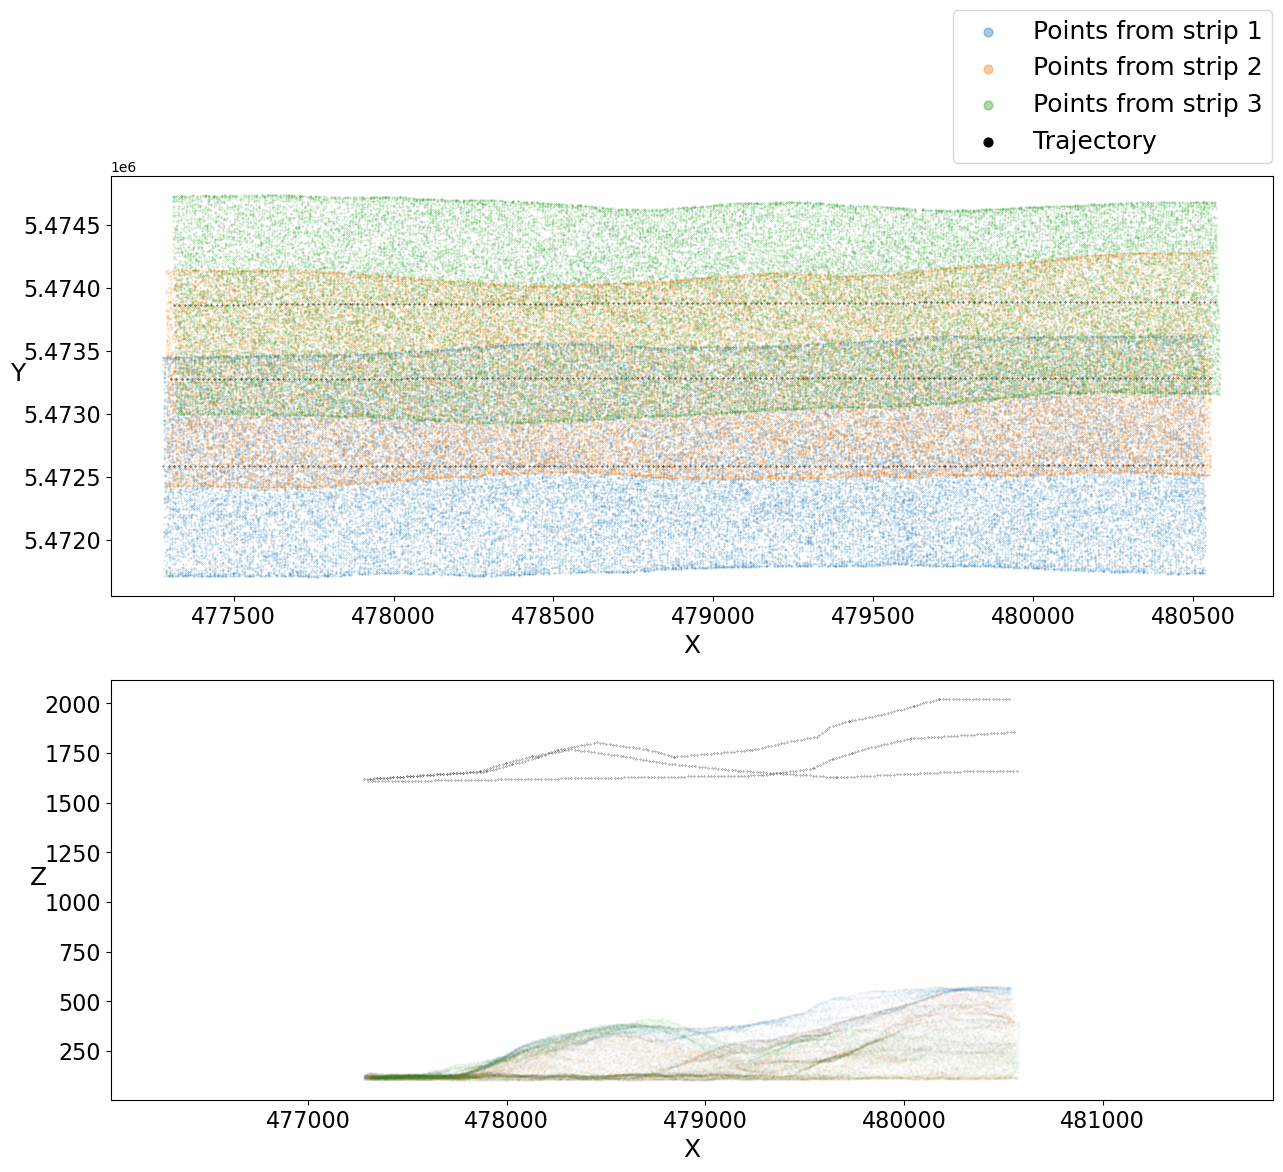

In [8]:
# two subplots
fig, (ax1, ax2) = plt.subplots(2, figsize=(15, 12))

# view from above, colored by strip, including trajectory - for faster display, show only every 25th measurement
ax1.scatter(strip_1[::25, 0], strip_1[::25, 1], s=0.1, alpha=0.4, label="Points from strip 1") # select X and Y coordinates
ax1.scatter(strip_2[::25, 0], strip_2[::25, 1], s=0.1, alpha=0.4, label="Points from strip 2")
ax1.scatter(strip_3[::25, 0], strip_3[::25, 1], s=0.1, alpha=0.4, label="Points from strip 3")
ax1.scatter(traj[:, 0], traj[:, 1], s=0.1, label="Trajectory", color="black")
ax1.tick_params(labelsize=16)
ax1.set_xlabel('X', fontsize=18)
ax1.set_ylabel('Y', fontsize=18, rotation=0)
ax1.legend(fontsize=18, markerscale=20, loc="lower right", bbox_to_anchor=(1.01, 1))

# use only every 50th measurement for better display
ax2.scatter(strip_1[::50, 0], strip_1[::50, 2], alpha=0.05, s=0.1, label="Points from strip 1") # select X and Z coordinates
ax2.scatter(strip_2[::50, 0], strip_2[::50, 2], alpha=0.05, s=0.1, label="Points from strip 2")
ax2.scatter(strip_3[::50, 0], strip_3[::50, 2], alpha=0.05, s=0.1, label="Points from strip 3")
ax2.scatter(traj[:, 0], traj[:, 2], s=0.05, label="Trajectory", color="black")
ax2.tick_params(labelsize=16)
ax2.set_xlabel('X', fontsize=18)
ax2.set_ylabel('Z', fontsize=18, rotation=0)

plt.axis('equal')
#plt.legend(fontsize=18, markerscale=20)
plt.show()

In addition we can create a 3D plot which shows the change in hight of the trajectory even better.

In [9]:
def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    '''

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius]) 
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

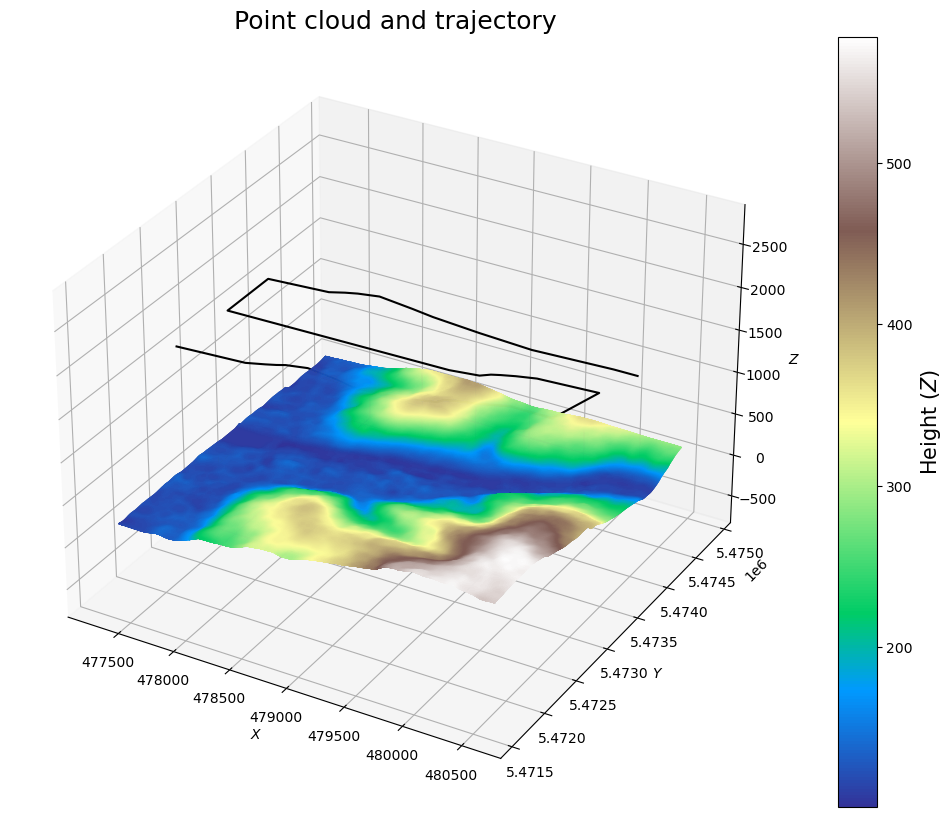

In [10]:
#stacking the strips 
strips= np.vstack((strip_1, strip_2, strip_3))

# Matplotlib figures.
fig = plt.figure(figsize=(15,10))

# Scatter plot of first scanner (coloured by height).
ax = fig.add_subplot(projection='3d')
sc = ax.scatter(strips[:, 0], strips[:, 1], strips[:, 2], c=strips[:, 2], cmap='terrain', s=0.02, label='scene')

# Plot of trajectory.
ax.plot(traj[:,0], traj[:,1], traj[:,2], c = 'black', label = 'scanner trajectory')


# Add axis labels.
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_zlabel('$Z$')

set_axes_equal(ax)    

# Set title.
ax.set_title(label='Point cloud and trajectory',fontsize=18)


cbar = plt.colorbar(sc)

cbar.set_label("Height ($Z$)", fontsize=15)

# Display results
plt.show()

